In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import pickle
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import sys
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from numpy import genfromtxt
#from dataframe import DataFrame

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df_train = pd.read_csv('KDDTrain.csv')
df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [3]:
df_test = pd.read_csv('KDDTest.csv')
df_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [4]:
mapping = {'http': 'browsing','http_8001': 'browsing','http_2784': 'browsing','http_443': 'browsing',          
           'ftp': 'file_transfer','ftp_data': 'file_transfer','efs': 'file_transfer','ldap': 'file_transfer',
           'tftp_u': 'file_transfer',          
           'pop_2': 'mail','pop_3': 'mail','smtp': 'mail','imap4': 'mail','aol': 'mail','nntp': 'mail','nnsp': 'mail',
           'iso_tsap': 'mail','csnet_ns': 'mail',          
           'remote_job': 'remote_jobs','rje': 'remote_jobs','sunrpc': 'remote_jobs','courier': 'remote_jobs',
           'exec': 'remote_jobs','printer': 'remote_jobs',      
           'daytime': 'time','time': 'time','ntp_u': 'time',         
           'name': 'DNS','hostnames': 'DNS','domain': 'DNS','whois': 'DNS',
           'netbios_ns': 'netbios','netbios_dgm': 'netbios','netbios_ssn': 'netbios',
           'eco_i': 'error_reports','urp_i': 'error_reports','ecr_i': 'error_reports','tim_i': 'error_reports',
           'red_i': 'error_reports','urh_i': 'error_reports',
           'finger': 'auth','auth': 'auth','supdup': 'auth','login': 'auth',
           'Z39_50': 'search','gopher': 'search',
           'kshell': 'kerberos','klogin': 'kerberos',
           'systat': 'unix','netstat': 'unix','X11': 'unix','discard': 'unix','echo': 'unix','uucp_path': 'unix',
           'uucp': 'unix',
           'telnet': 'telnet','ssh': 'telnet','shell': 'telnet',
           'ctf': 'text_services','IRC': 'text_services',
           'other': 'others','harvest': 'others','bgp': 'others','link': 'others','pm_dump': 'others',
           'private': 'private',
           'vmnet': 'virtual_network',
           'sql_net': 'oracle',
           'mtp': 'media','domain_u': 'media'
        }

In [5]:
# Apply service class mappings to the dataset
df_train['class'] = df_train['service'].apply(lambda v: mapping[v])
df_test['class'] = df_test['service'].apply(lambda v: mapping[v])

In [6]:
# Drop service field from both train and test data
df_train.drop(['service'], axis=1, inplace=True)
df_test.drop(['service'], axis=1, inplace=True)

In [7]:
# View top 3 train data 
df_train.head(10)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,class
0,0,tcp,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,file_transfer
1,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,others
2,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,private
3,0,tcp,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,browsing
4,0,tcp,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,browsing
5,0,tcp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,private
6,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,private
7,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,private
8,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,remote_jobs
9,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,private


In [8]:
df_train['num_outbound_cmds'].value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [9]:
df_test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [10]:
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [11]:
# Service Distribution
service_freq_train = df_train[['class']].apply(lambda x: x.value_counts())
service_freq_test = df_test[['class']].apply(lambda x: x.value_counts())
service_freq_train['frequency_percent_train'] = round((100 * service_freq_train / service_freq_train.sum()),2)
service_freq_test['frequency_percent_test'] = round((100 * service_freq_test / service_freq_test.sum()),2)

service_dist = pd.concat([service_freq_train,service_freq_test], axis=1) 
service_dist


,class,frequency_percent_train,class,frequency_percent_test
browsing,40871,32.44,7889,34.99
private,21853,17.35,4774,21.18
mail,10462,8.30,2417,10.72
file_transfer,9512,7.55,1596,7.08
media,9482,7.53,926,4.11
error_reports,8291,6.58,1043,4.63
others,5551,4.41,941,4.17
auth,3695,2.93,259,1.15
unix,3351,2.66,232,1.03
telnet,2729,2.17,1668,7.40


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)
print (sc_traindf)

        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
enctest = testcat.drop(['class'], axis=1)

cat_Ytrain = traincat[['class']].copy()
cat_Ytest = testcat[['class']].copy()

In [14]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = df_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 40871, 11: 21853, 6: 10462, 4: 9512, 7: 9482, 3: 8291, 10: 5551, 1: 3695, 17: 3351, 14: 2729, 0: 2173, 12: 1822, 13: 1380, 16: 1343, 8: 1114, 15: 750, 5: 732, 18: 617, 9: 245})
Resampled dataset shape Counter({4: 40871, 10: 40871, 11: 40871, 2: 40871, 12: 40871, 0: 40871, 8: 40871, 3: 40871, 7: 40871, 14: 40871, 1: 40871, 17: 40871, 13: 40871, 6: 40871, 18: 40871, 5: 40871, 9: 40871, 16: 40871, 15: 40871})


### feature selection algorithm

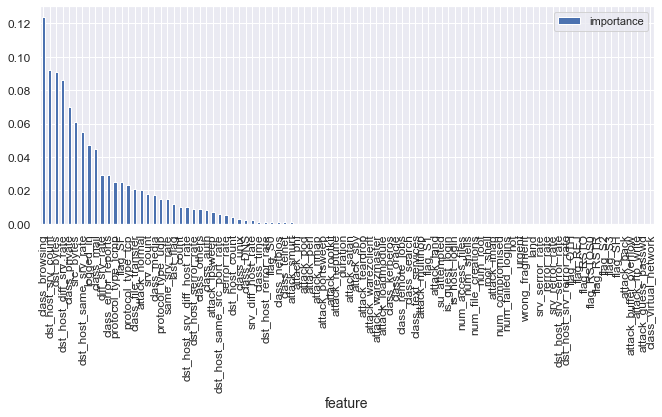

In [15]:
X_cat = df_train.select_dtypes(include=['object'])
X_num = df_train.select_dtypes(include=['float64','int64'])

X_cat_encoded = pd.get_dummies(X_cat)
X_encoded = pd.concat([X_num, X_cat_encoded], axis=1)

y = df_train["class"]

rfc = RandomForestClassifier(max_depth=2, random_state=0)

rfc.fit(X_encoded, y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature': X_encoded.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [16]:
X=df_train[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 
            'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]

y=df_train['class']

print("Splitting into train and test")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

Splitting into train and test


In [17]:
def pretty_confusion(y_true, y_pred, model_name):
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)
    
    # Add labels to the plot
    class_names = ['DNS', 'auth', 'browsing', 'error_reports', 'file_transfer', 'kerberos', 'mail', 'media', 'netbios',
                   'oracle', 'others', 'private', 'remote_jobs', 'search', 'telnet', 'text_services', 'time', 'unix',
                   'virtual_network']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for {}'.format(model_name)) 
    plt.tight_layout()

### Random Forest Classifier

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sélection des colonnes
X = df_train[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 
              'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]

y = df_train['class']

# Prétraitement des données: Encodage One-Hot des caractéristiques non numériques
cat_columns = ['flag','attack']
X['flag'] =X['flag'].astype('category')
X['attack'] =X['attack'].astype('category')
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
#X = pd.get_dummies(X, columns=['flag', 'attack'])
X.head(10)

,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,wrong_fragment,root_shell,land,flag,attack,dst_host_count,src_bytes
0,0.00,0.03,0.17,0,0,0,9,11,150,491
1,0.00,0.60,0.88,0,0,0,9,11,255,146
2,0.00,0.05,0.00,0,0,0,5,9,255,0
3,0.04,0.00,0.03,0,0,0,9,11,30,232
4,0.00,0.00,0.00,0,0,0,9,11,255,199
5,0.00,0.07,0.00,0,0,0,1,9,255,0
6,0.00,0.05,0.00,0,0,0,5,9,255,0
7,0.00,0.07,0.00,0,0,0,5,9,255,0
8,0.00,0.05,0.00,0,0,0,5,9,255,0
9,0.00,0.06,0.00,0,0,0,5,9,255,0


Splitting into train and test
Training Started
Testing the classifier
accuracy 0.7804413398952215


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.73      0.04      0.08       194
           auth       0.87      0.22      0.36       376
       browsing       0.99      0.96      0.97      4092
  error_reports       1.00      0.99      1.00       858
  file_transfer       0.89      0.70      0.79       925
       kerberos       0.00      0.00      0.00        79
           mail       0.93      0.68      0.78      1014
          media       0.99      0.95      0.97       974
        netbios       0.00      0.00      0.00       109
         oracle       0.00      0.00      0.00        20
         others       0.86      0.72      0.78       594
        private       0.47      0.96      0.63      2162
    remote_jobs       0.33      0.01      0.01       176
         search       0.50      0.01      0.01   

['your_model.joblib']

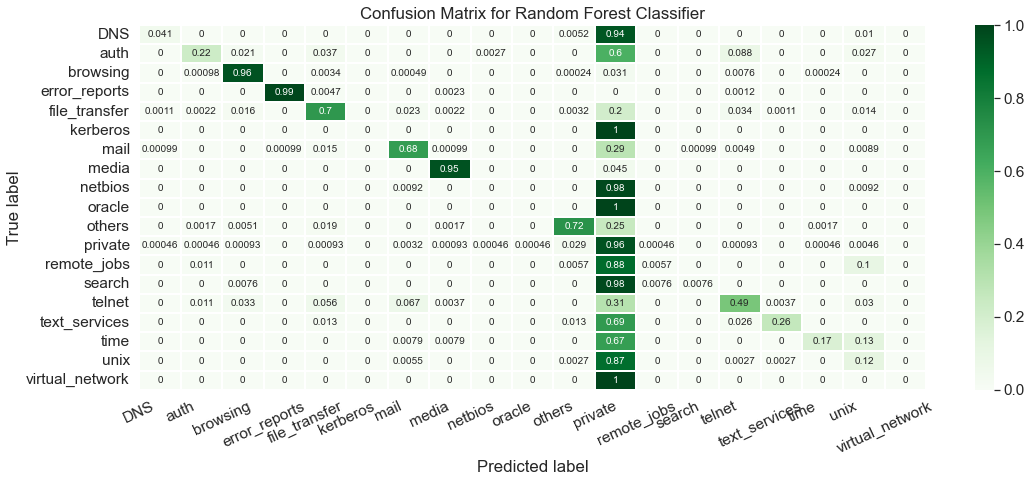

In [19]:


print("Splitting into train and test")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

# Création et entraînement du modèle RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=1)
print("Training Started")
clf.fit(X_train, y_train)

# Test du modèle et obtention des prédictions
print("Testing the classifier")
y_pred = clf.predict(X_test)

# Affichage des métriques de performance
print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test, y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
# Remplacez "pretty_confusion" par la fonction appropriée pour afficher la matrice de confusion
pretty_confusion(y_test, y_pred, "Random Forest Classifier")
#saving the model 


In [20]:
test_X=df_test[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 
              'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]
test_y=df_test['class']
# Prétraitement des données: Encodage One-Hot des caractéristiques non numériques
cat_columns = ['flag','attack']
test_X['flag'] =test_X['flag'].astype('category')
test_X['attack'] =test_X['attack'].astype('category')
test_X[cat_columns] = test_X[cat_columns].apply(lambda x: x.cat.codes)
#test_X = pd.get_dummies(test_X, columns=['flag', 'attack'])
test_X.head(10)


,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,wrong_fragment,root_shell,land,flag,attack,dst_host_count,src_bytes
0,0.00,0.06,0.00,0,0,0,1,14,255,0
1,0.00,0.06,0.00,0,0,0,1,14,255,0
2,0.02,0.04,0.61,0,0,0,9,16,134,12983
3,0.28,0.00,1.00,0,0,0,9,24,3,20
4,0.02,0.17,0.03,0,0,0,2,11,29,0
5,0.03,0.00,0.01,0,0,0,9,16,155,267
6,0.00,0.72,0.00,0,0,0,9,16,255,1022
7,0.00,0.00,0.00,0,0,0,9,4,255,129
8,0.03,0.00,0.01,0,0,0,9,16,151,327
9,0.00,0.08,0.02,0,0,0,9,4,52,26


Testing the classifier model
accuracy 0.6521469127040455


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.07      0.32      0.11       259
       browsing       0.96      0.96      0.96      7889
  error_reports       0.44      0.33      0.38      1043
  file_transfer       0.53      0.73      0.61      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.80      0.47      0.59      2417
          media       0.37      0.71      0.49       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.39      0.38      0.39       941
        private       0.57      0.63      0.60      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.41      0

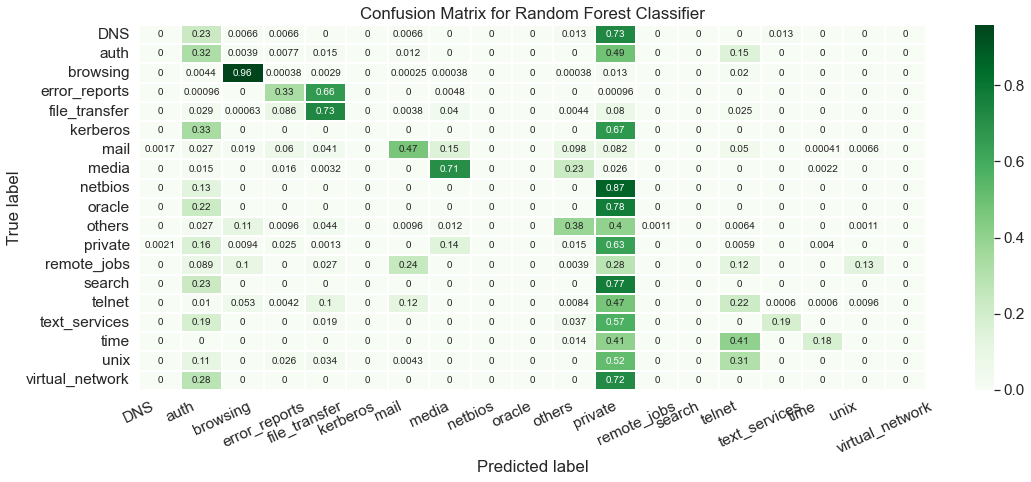

In [21]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)


print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "Random Forest Classifier")

In [23]:
import joblib

joblib.dump(clf, 'your_model.joblib')

['your_model.joblib']